In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
from shapely.ops import nearest_points
from shapely.geometry import Point, MultiPoint
import fiona
from fiona.crs import from_epsg
from scipy.spatial import cKDTree
import numpy as np
import osmnx as ox

pd.options.display.max_rows = 4
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share" #window

In [5]:
#Filepaths
work = r"D:"
laptop = r"C:\Users\jerem"
origin = work

In [6]:
fp =  r"\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_panel_thiessen_polygons.shp"
df = gpd.read_file(origin+fp)

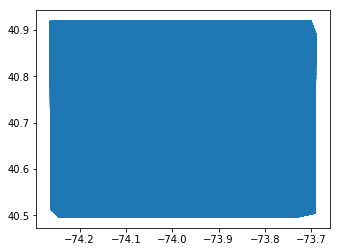

In [12]:
df.plot()

In [7]:
fp = r"\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.shp"
df2 = gpd.read_file(origin+fp)

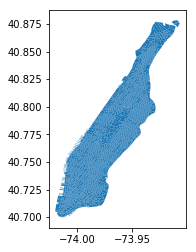

In [13]:
df2.plot()

In [8]:
df.crs

{'proj': 'lcc',
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000.0000000001,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [10]:
# Reproeject LPIS shapefile to EPSG 4326: WGS84
df = df.to_crs({'init': 'epsg:4326'})
df2 = df2.to_crs({'init': 'epsg:4326'})

In [11]:
df.crs = df2.crs

In [16]:
# intersection_with_df2 = gpd.sjoin(df,df2, how='inner', op='intersects')
intersection_with_df2 = gpd.overlay(df, df2, how='intersection')

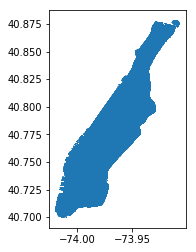

In [17]:
intersection_with_df2.plot()

In [18]:
intersection_with_df2.columns

Index(['collision__1', 'personsinj_1', 'pedestrian_1', 'cyclistinj_1',
       'motoristin_1', 'bronx', 'brooklyn', 'manhattan', 'queens',
       'statenisla_1', 'distance_t_1', 'distance_1_1', 'distance_2_1',
       'distance_3_1', 'distance_4_1', 'distance_5_1', 'flag_left__1',
       'flag_lef_1_1', 'flag_LPIS__1', 'flag_LPIS', 'bike_route_1',
       'bike_rou_1_1', 'flag_senio_1', 'flag_prior_1', 'flag_schoo_1',
       'flag_stree_1', 'quarter', 'year', 'intersecti_1', 'y', 'x', 'DUP_IDS',
       'collision__2', 'personsinj_2', 'pedestrian_2', 'cyclistinj_2',
       'motoristin_2', 'bronx_left', 'brooklyn_l', 'manhattan_', 'queens_lef',
       'statenisla_2', 'distance_t_2', 'distance_1_2', 'distance_2_2',
       'distance_3_2', 'distance_4_2', 'distance_5_2', 'flag_left__2',
       'flag_lef_1_2', 'flag_LPIS__2', 'flag_LPI_1', 'bike_route_2',
       'bike_rou_1_2', 'flag_senio_2', 'flag_prior_2', 'flag_schoo_2',
       'flag_stree_2', 'quarter_le', 'year_left', 'intersecti_2', 'y_l

In [22]:
save_out = intersection_with_df2[['collision__1', 'personsinj_1', 'pedestrian_1', 'cyclistinj_1',
       'motoristin_1', 'bronx', 'brooklyn', 'manhattan', 'queens',
       'statenisla_1', 'distance_t_1', 'distance_1_1', 'distance_2_1',
       'distance_3_1', 'distance_4_1', 'distance_5_1', 'flag_left__1',
       'flag_lef_1_1', 'flag_LPIS__1', 'flag_LPIS', 'bike_route_1',
       'bike_rou_1_1', 'flag_senio_1', 'flag_prior_1', 'flag_schoo_1',
       'flag_stree_1', 'quarter', 'year', 'intersecti_1', 'y', 'x', 'geometry']]
    
fp = r"\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_thiessen_polygons_clipped_manhattan.shp"
save_out.to_file(origin+fp)